In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

In [2]:
housevalue = fch()
housevalue.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [3]:
X = pd.DataFrame(housevalue.data)
X.shape

(20640, 8)

In [4]:
y = housevalue.target
y.min()

0.14999

In [5]:
y.max()

5.00001

In [6]:
y.shape

(20640,)

In [7]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
X.columns = housevalue.feature_names

MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [11]:
Xtest.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5156,1.7656,42.0,4.144703,1.031008,1581.0,4.085271,33.96,-118.28
19714,1.5281,29.0,5.095890,1.095890,1137.0,3.115068,39.29,-121.68
18471,4.1750,14.0,5.604699,1.045965,2823.0,2.883555,37.14,-121.64
16156,3.0278,52.0,5.172932,1.085714,1663.0,2.500752,37.78,-122.49
7028,4.5000,36.0,4.940447,0.982630,1306.0,3.240695,33.95,-118.09


In [12]:
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17073,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
16956,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
20012,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
13072,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
8457,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [13]:
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [14]:
Xtrain.shape

(14448, 8)

In [15]:
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat.min()

-0.6528439725035895

In [16]:
yhat.max()

7.146198214270882

In [17]:
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [18]:
Xtrain.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [19]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.43735893059684033),
 ('HouseAge', 0.010211268294494024),
 ('AveRooms', -0.10780721617317683),
 ('AveBedrms', 0.6264338275363768),
 ('Population', 5.216125353123053e-07),
 ('AveOccup', -0.003348509646333473),
 ('Latitude', -0.41309593789477156),
 ('Longitude', -0.4262109536208467)]

In [20]:
reg.intercept_

-36.25689322920383

In [21]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,Ytest)

0.530901263932457

In [22]:
Ytest.mean()

2.0819292877906976

In [23]:
y.max()

5.00001

In [24]:
y.min()

0.14999

In [25]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [26]:
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [27]:
from sklearn.metrics import r2_score
r2_score(yhat,Ytest)

0.33806537615560117

In [28]:
r2 = reg.score(Xtest,Ytest)
r2

0.6043668160178818

In [29]:
r2_score(Ytest,yhat)

0.6043668160178818

In [30]:
r2_score(y_true = Ytest,y_pred = yhat)

0.6043668160178818

In [31]:
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.511006861052455

In [32]:
import matplotlib.pyplot as plt
sorted(Ytest)

[0.14999,
 0.14999,
 0.225,
 0.325,
 0.35,
 0.375,
 0.388,
 0.392,
 0.394,
 0.396,
 0.4,
 0.404,
 0.409,
 0.41,
 0.43,
 0.435,
 0.437,
 0.439,
 0.44,
 0.44,
 0.444,
 0.446,
 0.45,
 0.45,
 0.45,
 0.45,
 0.455,
 0.455,
 0.455,
 0.456,
 0.462,
 0.463,
 0.471,
 0.475,
 0.478,
 0.478,
 0.481,
 0.481,
 0.483,
 0.483,
 0.485,
 0.485,
 0.488,
 0.489,
 0.49,
 0.492,
 0.494,
 0.494,
 0.494,
 0.495,
 0.496,
 0.5,
 0.5,
 0.504,
 0.505,
 0.506,
 0.506,
 0.508,
 0.508,
 0.51,
 0.516,
 0.519,
 0.52,
 0.521,
 0.523,
 0.523,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525,
 0.527,
 0.527,
 0.528,
 0.529,
 0.53,
 0.531,
 0.532,
 0.534,
 0.535,
 0.535,
 0.535,
 0.538,
 0.538,
 0.539,
 0.539,
 0.539,
 0.541,
 0.541,
 0.542,
 0.542,
 0.542,
 0.543,
 0.543,
 0.544,
 0.544,
 0.546,
 0.547,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.551,
 0.553,
 0.553,
 0.553,
 0.554,
 0.554,
 0.554,
 0.555,
 0.556,
 0.556,
 0.557,
 0.558,
 0.558,
 0.559,
 0.559,
 0.559,
 0.559,
 0.56,
 0.56,
 0.562,
 0.566,
 0.567,
 

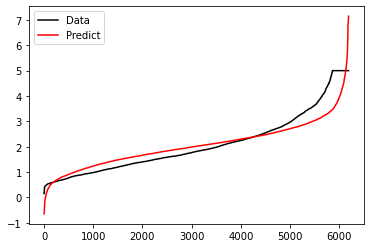

In [33]:
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

In [34]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-179.12952605,   -5.692624  ,  -15.61747513,  -78.68042858,
        -59.5311006 ])

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [36]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [37]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [38]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [39]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [40]:
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.6043610352312278

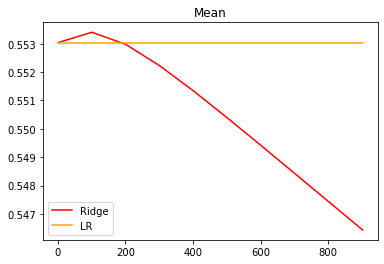

In [41]:
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

In [42]:
reg = Ridge(alpha=0).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.6043668160178814

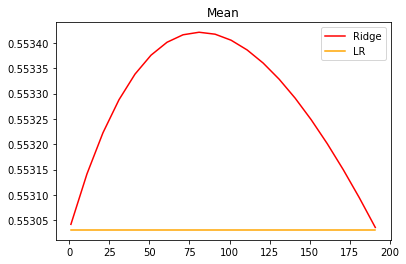

In [43]:
alpharange = np.arange(1,201,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

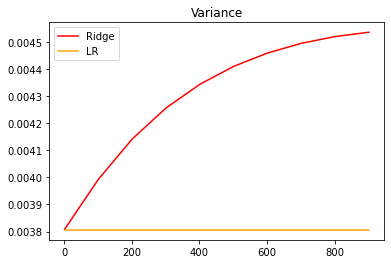

In [44]:
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

In [45]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

X = load_boston().data
y = load_boston().target

Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [46]:
X.shape

(506, 13)

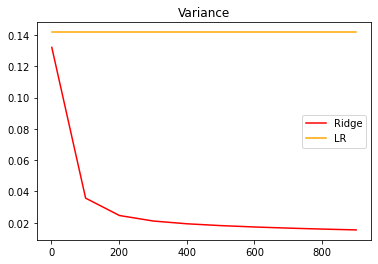

In [47]:
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

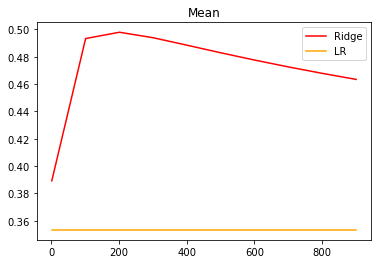

In [48]:
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

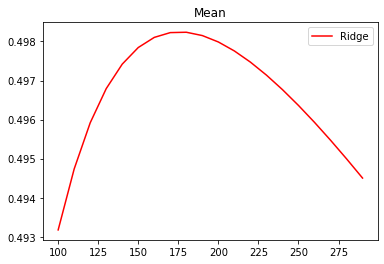

In [49]:
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    #linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    #linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
#plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                 #,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                 #,cv=5
                ).fit(X, y)

In [51]:
Ridge_.score(X,y)

0.6060251767338437

In [52]:
Ridge_.cv_values_

array([[0.1557472 , 0.16301246, 0.16892723, ..., 0.18881663, 0.19182353,
        0.19466385],
       [0.15334566, 0.13922075, 0.12849014, ..., 0.09744906, 0.09344092,
        0.08981868],
       [0.02429857, 0.03043271, 0.03543001, ..., 0.04971514, 0.05126165,
        0.05253834],
       ...,
       [0.56545783, 0.5454654 , 0.52655917, ..., 0.44532597, 0.43130136,
        0.41790336],
       [0.27883123, 0.2692305 , 0.25944481, ..., 0.21328675, 0.20497018,
        0.19698274],
       [0.14313527, 0.13967826, 0.13511341, ..., 0.1078647 , 0.10251737,
        0.0973334 ]])

In [53]:
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [54]:
Ridge_.alpha_

101

In [55]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [57]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [58]:
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()

[43.73589305968403,
 1.0211268294494025,
 -10.780721617317683,
 62.64338275363768,
 5.216125353123053e-05,
 -0.3348509646333473,
 -41.309593789477155,
 -42.621095362084674]

In [59]:
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.73589305968403,
 1.0211268294494154,
 -10.780721617317607,
 62.643382753637326,
 5.216125353271531e-05,
 -0.3348509646333586,
 -41.30959378947669,
 -42.62109536208426]

In [60]:
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

<ipython-input-60-4c1e85f69c4a>:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.770e+03, tolerance: 1.917e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[43.73589305968403,
 1.0211268294494054,
 -10.780721617317662,
 62.64338275363783,
 5.216125353266305e-05,
 -0.33485096463335706,
 -41.309593789477205,
 -42.62109536208479]

In [61]:
Ridge_ = Ridge(alpha=0.1).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.73453480786962,
 1.021150851842571,
 -10.778109335481922,
 62.62978997580449,
 5.2255520319394335e-05,
 -0.3348478363544376,
 -41.30937006538731,
 -42.62068050768427]

In [62]:
lasso_ = Lasso(alpha=0.1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[39.08851438329683,
 1.6054695654279871,
 -0.0,
 0.0,
 0.0023777014839091353,
 -0.30501868956381134,
 -10.771509301655533,
 -9.294344477958068]

In [63]:
Ridge_ = Ridge(alpha=10**10).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[0.00021838533330206371,
 0.00021344956264503443,
 6.213673042878624e-05,
 -3.828084920732733e-06,
 -0.0014984087286952854,
 -4.1752437146538365e-05,
 -5.295061194474958e-05,
 -1.3268982521957723e-05]

In [64]:
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [65]:
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[14.581141247629423,
 0.6209347344423873,
 0.0,
 -0.0,
 -0.0002806598632901001,
 -0.0,
 -0.0,
 -0.0]

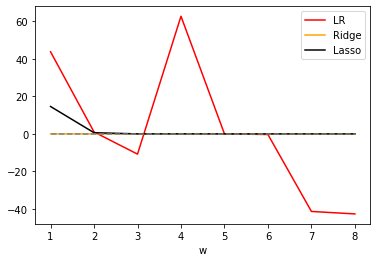

In [66]:
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w')
plt.legend()
plt.show()

In [67]:
from sklearn.linear_model import LassoCV
alpharange = np.logspace(-10, -2, 200,base=10)
alpharange.shape

(200,)

In [68]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [69]:
lasso_ = LassoCV(alphas=alpharange 
                ,cv=5 
                ).fit(Xtrain, Ytrain)

In [70]:
lasso_.alpha_

0.0020729217795953697

In [71]:
lasso_.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [72]:
lasso_.mse_path_.shape

(200, 5)

In [73]:
lasso_.mse_path_.mean(axis=1)

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [74]:
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [75]:
lasso_.score(Xtest,Ytest)

0.6038982670571438

In [76]:
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.6043668160178818

In [77]:
ls_ = LassoCV(eps=0.00001
              ,n_alphas=300
              ,cv=5
                ).fit(Xtrain, Ytrain)
ls_.alphas_

array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [78]:
ls_.alphas_.shape

(300,)

In [79]:
ls_.score(Xtest,Ytest)

0.6038915423819199

In [80]:
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [82]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100)
X

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504,
       -2.26777059, -0.02893854, -2.79366887,  2.45592241, -1.44732011,
        0.97513371, -1.12973354,  0.12040813,  0.28026168, -1.89087327,
        2.81750777,  1.65079694,  2.63699365,  2.3689641 ,  0.58739987,
        2.53124541, -2.46904499, -1.82410283, -2.72863627, -1.04801802,
       -0.66793626, -1.37190581,  1.97242505, -0.85948004, -1.31439294,
        0.2561765 , -2.15445465,  1.81318188, -2.55269614,  2.92

In [83]:
y = np.sin(X) + rnd.normal(size=len(X)) / 3

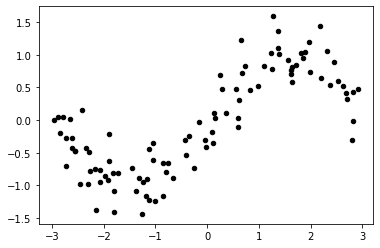

In [84]:
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

In [85]:
X.shape

(100,)

In [86]:
X = X.reshape(-1, 1)
X.shape

(100, 1)

In [87]:
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

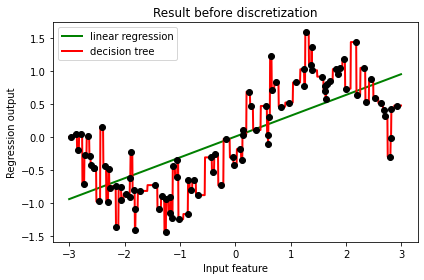

In [88]:

fig, ax1 = plt.subplots(1)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")

ax1.plot(X[:, 0], y, 'o', c='k')

ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()


In [89]:
from sklearn.preprocessing import KBinsDiscretizer

#将数据分箱
enc = KBinsDiscretizer(n_bins=10 #分几类？
                       ,encode="onehot") #ordinal
X_binned = enc.fit_transform(X)
X_binned.shape

(100, 10)

In [90]:
line.shape

(1000, 1)

In [91]:
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

LinearR_ = LinearRegression().fit(X_binned, y)

line_binned = enc.transform(line)
LinearR_.predict(line_binned)

array([-0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22

In [92]:
enc.bin_edges_[0]

array([-2.9668673 , -2.55299973, -2.0639171 , -1.3945301 , -1.02797432,
       -0.21514527,  0.44239288,  1.14612193,  1.63693428,  2.32784522,
        2.92132162])

[0.0, 1.0]

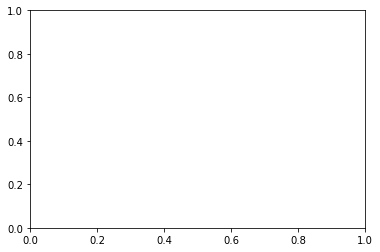

In [93]:
[*plt.gca().get_ylim()]

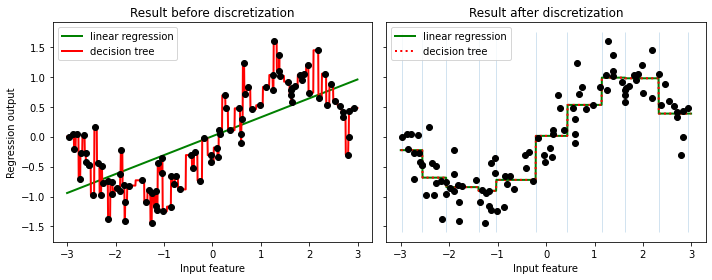

In [94]:
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)


fig, (ax1, ax2) = plt.subplots(ncols=2
                               , sharey=True 
                               , figsize=(10, 4))


ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")


LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)


ax2.plot(line
         , LinearR_.predict(line_binned) 
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')

ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')


ax2.vlines(enc.bin_edges_[0] 
           , *plt.gca().get_ylim() 
           , linewidth=1
           , alpha=.2)


ax2.plot(X[:, 0], y, 'o', c='k')

ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

0.9590978882491229


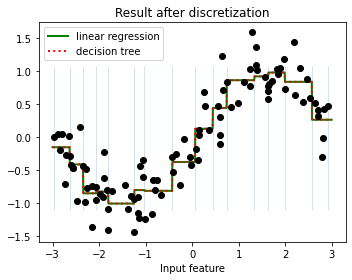

In [95]:
enc = KBinsDiscretizer(n_bins=15,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

fig, ax2 = plt.subplots(1,figsize=(5,4))

LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

ax2.plot(line 
         , LinearR_.predict(line_binned)
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

In [96]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np

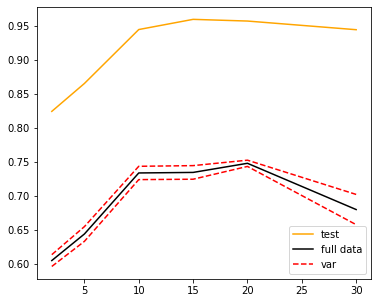

In [97]:
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:

    enc = KBinsDiscretizer(n_bins=i,encode="onehot")

    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)

    LinearR_ = LinearRegression()

    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())

    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))

plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

In [98]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [99]:
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [100]:
poly = PolynomialFeatures(degree=2)

In [101]:
X_ = poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [102]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [103]:
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [104]:
xxx = PolynomialFeatures(degree=3).fit_transform(X)

In [105]:
xxx.shape

(3, 4)

In [106]:
rnd = np.random.RandomState(42) #设置随机数种子
y = rnd.randn(3)

y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [107]:
LinearRegression().fit(xxx,y).coef_

array([ 1.36002321e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [108]:
LinearRegression().fit(xxx,y).intercept_

1.2351711202036895

In [109]:
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [110]:
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

In [111]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [112]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [113]:
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [114]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [115]:
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [116]:
X = np.arange(20).reshape(2, 10)
X

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [117]:
PolynomialFeatures(degree=2).fit_transform(X).shape

(2, 66)

In [118]:
PolynomialFeatures(degree=3).fit_transform(X).shape

(2, 286)

In [119]:
X_ = PolynomialFeatures(degree=20).fit_transform(X)

X_.shape

(2, 30045015)

In [120]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

rnd = np.random.RandomState(42) 
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3


X = X.reshape(-1,1)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [121]:

LinearR = LinearRegression().fit(X, y)
LinearR.score(X,y)

0.5361526059318595

In [122]:

LinearR.score(line,np.sin(line))

0.6800102369793312

In [123]:
d=5

poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = poly.transform(line)

LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)

0.8561679370344799

In [124]:
LinearR_.score(line_,np.sin(line))

0.9868904451787976

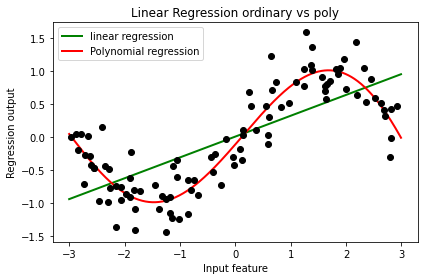

In [125]:
import matplotlib.pyplot as plt

d=5

LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line)

fig, ax1 = plt.subplots(1)

ax1.plot(line, LinearR.predict(line), linewidth=2, color='green'
         ,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red'
         ,label="Polynomial regression")

ax1.plot(X[:, 0], y, 'o', c='k')

ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()


In [126]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [127]:
poly = PolynomialFeatures(degree=5).fit(X)

In [128]:
poly.get_feature_names()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [129]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [130]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [131]:
poly = PolynomialFeatures(degree=4).fit(X,y)

poly.get_feature_names(X.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2',
 '住户收入中位数^3',
 '住户收入中位数^2 房屋使用年代中位数',
 '住户收入中位数^2 平均房间数目',
 '住户收入中位数^2 平均卧室数目',
 '住户收入中位数^2 街区人口',
 '住户收入中位数^2 平均入住率',
 '住户收入中位数^2 街区的纬度',
 '住户收入中位数^2 街区的经度',
 '住户收入中位数 房屋使用年代中位数^2',
 '住户收入中位数 房屋使用年代中位数 平均房间数目',
 '住户收入中位数 房屋使用年代中位数 平均卧室数目',
 '住户收入中位数 房屋使用年代中位数 街区人口',
 '住户收入中位数 房屋使用年代中位数 平均入住率',
 '住户收入中位数 房

In [132]:
X_ = poly.transform(X)
reg = LinearRegression().fit(X_,y)
coef = reg.coef_
coef

array([ 3.10531006e-04,  1.15013453e-05, -4.62410864e-07, -7.62425210e-08,
       -1.91767405e-07, -5.22849357e-05,  1.24168406e-07,  3.02804703e-07,
        3.83639530e-08, -8.91730044e-06, -1.15463672e-05, -1.93212147e-05,
       -2.63542359e-06, -2.33966502e-05,  2.44085402e-06, -2.03958154e-07,
        8.05184633e-06, -2.12940817e-05,  8.44782837e-06, -7.59448871e-06,
       -7.52412859e-04,  3.49827618e-05,  4.93216886e-06,  5.32599900e-05,
       -1.19882405e-05,  3.14489816e-06, -1.28328589e-04, -5.34392515e-06,
        1.00045367e-07,  3.03945492e-07,  1.83513500e-06, -3.97648573e-05,
       -1.30104839e-06, -1.65957429e-06,  1.13155588e-05,  2.44083858e-05,
       -4.94427644e-05, -7.00032929e-04,  2.09165626e-03, -7.61088573e-06,
       -9.74006971e-07, -4.60292556e-06, -4.37693283e-06, -2.42886336e-05,
       -6.47153799e-06, -8.45851580e-05, -1.55933936e-04, -9.05001607e-05,
       -1.23982365e-05,  6.27317137e-04,  3.38804414e-05, -1.72968243e-04,
        5.38804641e-04, -

In [133]:
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('1', 0.00031053100567372376),
 ('住户收入中位数', 1.1501345286204895e-05),
 ('房屋使用年代中位数', -4.624108636776698e-07),
 ('平均房间数目', -7.624252095910431e-08),
 ('平均卧室数目', -1.9176740488473108e-07),
 ('街区人口', -5.2284935722580755e-05),
 ('平均入住率', 1.2416840603455947e-07),
 ('街区的纬度', 3.028047033368794e-07),
 ('街区的经度', 3.836395300586163e-08),
 ('住户收入中位数^2', -8.917300439034329e-06),
 ('住户收入中位数 房屋使用年代中位数', -1.1546367216825562e-05),
 ('住户收入中位数 平均房间数目', -1.9321214692787667e-05),
 ('住户收入中位数 平均卧室数目', -2.635423589560063e-06),
 ('住户收入中位数 街区人口', -2.3396650157354526e-05),
 ('住户收入中位数 平均入住率', 2.4408540166196536e-06),
 ('住户收入中位数 街区的纬度', -2.0395815438437207e-07),
 ('住户收入中位数 街区的经度', 8.051846325935085e-06),
 ('房屋使用年代中位数^2', -2.129408167564053e-05),
 ('房屋使用年代中位数 平均房间数目', 8.447828374969907e-06),
 ('房屋使用年代中位数 平均卧室数目', -7.594488708908304e-06),
 ('房屋使用年代中位数 街区人口', -0.0007524128585868796),
 ('房屋使用年代中位数 平均入住率', 3.498276183024343e-05),
 ('房屋使用年代中位数 街区的纬度', 4.932168861894222e-06),
 ('房屋使用年代中位数 街区的经度', 5.3259989963471034e-05),
 

In [134]:
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T
coeff.head()

,0,1
0,1,0.000311
1,住户收入中位数,0.000012
2,房屋使用年代中位数,-0.0
3,平均房间数目,-0.0
4,平均卧室数目,-0.0


In [135]:
coeff.columns = ["feature","coef"]
coeff.sort_values(by="coef")

,feature,coef
491,街区的纬度^3 街区的经度,-0.010766
490,街区的纬度^4,-0.00871
492,街区的纬度^2 街区的经度^2,-0.004985
377,平均房间数目^2 平均卧室数目 平均入住率,-0.003759
421,平均房间数目 街区的纬度^3,-0.002573
...,...,...
38,街区人口 街区的经度,0.002092
183,住户收入中位数^2 平均房间数目 平均入住率,0.002104
319,房屋使用年代中位数 平均房间数目 平均卧室数目^2,0.002474
168,住户收入中位数^3 平均卧室数目,0.002866


In [136]:
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)

In [137]:
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.606232685199805

In [138]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))

R2:0.7451090624007497
time:0.44254612922668457


In [139]:
from sklearn.ensemble import RandomForestRegressor as RFR

time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.9746835528492525
time:11.056869745254517
